# 회귀 분석

## 회귀(Regression)
- 데이터의 값은 평균과 같은 기존의 경향으로 돌아가려는 경향
- 여러 변수들 간의 상관 관계를 파악하여, 어떤 특정 변수의 값을 다른 변수들의 값을 이용하여 설명/예측하는 기법
- 독립변수, 종속변수

## 회귀 분석의 유형
- 변수의 개수 및 계수의 형태에 따라 구분
- 독립변수의 개수에 따라
    - 단순 : 독립변수가 1개인 경우
    - 다중 : 독립변수가 여러 개인 경우
- 회귀계수의 형태에 따라
    - 선형 : 계수를 선형 결합으로 표현할 수 있는 경우
    - 비선형 : 계수를 선형 결합으로 표현할 수 없는 경우
    
    

## 단순 선형 회귀
- 독립변수가 1개이고 종속변수도 1개인 경우, 그들 간의 관계를 **선형적으로 파악**하는 회귀 방식
- `독립변수 X`와 `종속변수 Y`의 **`관계`**를 **`Y = aX + b 형태의 1차 함수식`**으로 표현

### 회귀 계수 (coefficient) → y = **`a`**x+b
- 독립변수가 종속변수에 끼치는 영향력의 정도로서, 직선의 기울기(slope)

### 절편 (intercept) → y = ax+**`b`**
- 독립변수가 0일 때의 상수 값

### 잔차 (residual) → y = ax+b+**`Error`**
- 실제 값과 회귀식의 차이에 따른 오류 값
- 잔차 값이 작을수록, 구해진 회귀식이 데이터들을 더욱 잘 설명하고 있다

### 잔차제곱합 (RSS; Residual Sum of Squares)
- 잔차는 양수 또는 음수가 될 수 있는 값이므로 이들을 단순히 더하면 안 되고,이 값들의 제곱을 구해서 더함
> $RSS = \sum{(yi – (w_0 + w_1ㆍx_i))^2}$
- 이 때, RSS를 회귀 분석에서의 손실 함수(loss function) 또는 비용 함수(cost function)
- 최적의 회귀 모형을 만든다는 것은 RSS 값이 최소가 되는 회귀 계수를 구한다는 의미

## 회귀 분석의 평가 지표

|지표|의미|대응함수|
|---|---|---|
|MAE|Mean Absolute Error, 즉 실제값과 예측값의 차이의 절대값들의 평균|metrics 모듈의 mean_absolute_error|
|MSE|Mean Absolute Error, 즉 실제값과 예측값의 차이의 절대값들의 평균|metrics 모듈의 mean_squared_error|
|RMSE|Root of MSE, 즉 MSE의 제곱근 값|math 또는 numpy 모듈의 sqrt|
|$R^2$|결정 계수라고 하며, 실제값의 분산 대비 예측값의 분산의 비율|metrics 모듈의 r2_score 또는 LinearRegression의 score|

### 결정 계수 (Coefficient of Determination)
- 회귀식이 얼마나 설명력이 있는지 (즉, 얼마나 정확한지) 나타내는 지표
- 결정 계수의 값은 0 ≤ R2 ≤ 1이며, 1에 가까울수록 설명력이 강하고 0에 가까울수록 설명력이 약하다
- 일반적으로 결정 계수 R2의 값이 0.65 (65%) 이상이면 설명력이 있다고 판단
- 음의 값이 나오면 회귀분석을 하면 안되는거 였음

### 최소제곱법 (OLS; Ordinary Least Squares)
- 잔차제곱합 RSS 값이 최소화 되도록 손실 함수의 매개변수 $w_0$와 $w_1$의 값을 구함
- $w_0$와 $w_1$으로 RSS 함수를 각각 편미분한 값이 0이 되는 연립 방정식의 해를 구함

### 사이킷런에서 최소제곱법으로 단순 선형 회귀 수행
#### 1. linear_model 모듈에 있는 LinearRegression을 이용하여 OLS 방법으로 선형 회귀를 수행할 수 있는 객체를 생성
    - 이 때 다음과 같은 매개변수들을 추가 설정할 수 있으나, 대부분의 경우에는 필요하지 않음
    - fit_intercept : `절편 값을 계산할 것인지의 여부`를 결정한다. 기본값은 True
    - normalize : 회귀를 수행하기 전에 데이터를 `정규화할 것인지의 여부`를 결정한다. 기본값은 False

In [2]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()

#### 2. 선형 회귀를 수행할 객체에 대하여 **`fit 메소드를 이용하여 학습을 수행`**하여 회귀 모형을 추정
    - 첫 번째 매개변수는 학습용 데이터의 독립변수 집합
    - 두 번째 매개변수는 학습용 데이터의 종속변수 집합

In [4]:
X_train = [[1],[2],[3],[4],[5]] # 독립변수의 특성이 1개 밖에 없더라도 각 값들은 리스트 또는 배열의 형태
y_train = [2.3, 3.99, 5.15, 7.89, 8.6]
reg = lr.fit(X_train,y_train)

#### 3. 실행 객체 또는 추정된 회귀 모형에 대하여 **`predict 메소드를 이용`**하여 예측을 수행
    - 매개변수는 검증용 데이터의 독립변수 집합
    - 반환 결과는 검증용 데이터에 대한 종속변수 예측값

In [5]:
X_test = [[6],[7]]
y_test = [10.1, 11.9]
y_pred = reg.predict(X_test)
y_pred

array([10.536, 12.186])

#### 4. 분석 결과를 평가한다. (MSE 및 RMSE)

In [6]:
# metrics 모듈에 있는 mean_squared_error 함수를 이용하여 MSE를 구한다.
import sklearn.metrics as mt
mse = mt.mean_squared_error(y_test, y_pred) # 정답과 예측값 순서로
mse 

0.13594600000000165

In [7]:
# MSE의 제곱근을 계산하여 RMSE를 구한다
import numpy as np
rmse = np.sqrt(mse)
rmse

0.36870855699319166

In [9]:
# metrics 모듈에 있는 r2_score 함수를 이용하여 결정계수 R2 값을 구한다
# 첫 번째 매개변수는 검증용 데이터의 종속변수 실제값
# 두 번째 매개변수는 종속변수 예측값
r2 = mt.r2_score(y_test,y_pred)
r2 # 매우 좋은것 

0.8321654320987635

In [10]:
# 또는, 실행 객체 또는 추정된 회귀 모형에 대하여 score 메소드를 호출하여 R2 값을 구할 수도 있다
# 첫 번째 매개변수는 검증용 데이터의 독립변수
# 두 번째 매개변수는 종속변수
r2 = reg.score(X_test, y_test)
r2

0.8321654320987635

In [11]:
# 추정된 회귀 모형의 회귀 계수 및 절편 값을 확인
# 회귀 계수는 coef_ 속성, 절편은 intercept_ 속성에 각각 값이 할당
print("회귀 계수 : ",reg.coef_)
print("절편 : ",reg.intercept_)

회귀 계수 :  [1.65]
절편 :  0.6359999999999983


#### 5. 분석 결과를 플롯으로 표현

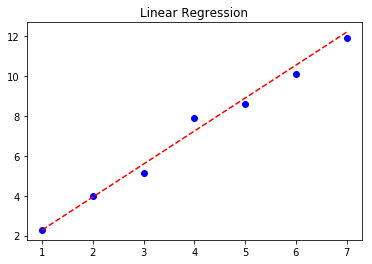

In [28]:
import matplotlib.pyplot as plt
x = range(1,8)
plt.title("Linear Regression")
plt.plot(X_train+X_test,y_train+y_test,'o',color = 'blue')
plt.plot(x,reg.coef_*x+reg.intercept_,'--',color='red')
plt.show()

---

### 스탯츠모델에서 최소제곱법으로 단순 선형 회귀 수행
#### 1. api 모듈에 있는 add_constant 함수를 이용하여 상수항을 추가하도록 지정
- 매개변수는 학습용 데이터의 독립변수 집합
- 반환 결과는 회귀 모형에 상수항이 추가되도록 변형된 독립변수 집합

In [29]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # 이게 꼭 있어야함, 대상은 원본
X_train

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

#### 2. api 모듈에 있는 OLS를 이용하여, 선형 회귀를 수행할 수 있는 객체를 생성
- 첫 번째 매개변수는 학습용 데이터의 종속변수 집합
- 두 번째 매개변수는 학습용 데이터의 독립변수 집합

#### 3. 선형 회귀를 수행할 객체에 대하여 fit 메소드를 이용하여 학습을 수행하여 회귀 모형을 추정
- 학습용 데이터들을 이미 객체에 넣어 주었기 때문에, 매개변수로 데이터를 전달하지 않는다

In [30]:
lr = sm.OLS(y_train,X_train) # 순서 주의!!
reg = lr.fit() # 인자가 따로 필요없음

#### 4. 추정된 회귀 모형에 대하여 predict 메소드를 이용하여 예측을 수행
- 매개변수는 검증용 데이터의 독립변수 집합으로서, 학습때와 마찬가지로 미리 상수항을 추가
- 반환 결과는 검증용 데이터에 대한 종속변수 예측값

In [31]:
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)
y_pred

array([10.536, 12.186])

#### 5. 추정된 회귀 모형에 대하여 summary 메소드를 이용하여 분석 결과를 평가한다. (R2, 회귀 계수, 기타 검정 통계량 등)

In [34]:
reg.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):            0.00171
Time:                        11:43:02   Log-Likelihood:                -2.1891
No. Observations:                   5   AIC:                             8.378
Df Residuals:                       3   BIC:                             7.597
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6360      0.508      1.253      0.299      -0.979       2.251
x1             1.6500      0.153     10.781      0.002       1.163       2.137
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.292
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.468
Skew:                           0.659   Prob(JB):                        0.791
Kurtosis:                       2.286   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 참고

## 평가 지표에 대한 이해

### 공분산 (Covariance)
- 2개의 변수들 간의 상관 관계를 나타낸 수치
- 2개의 변수 X, Y에 대하여 X(또는 Y)의 값이 변화할 때 Y(또는 X)의 값이 어떻게 분포되는가
> $ Cov(X,Y) = E((X-\mu)*(Y-\nu)) $

### 상관 계수 (Correlation Coefficient)
- 공분산을 각각의 표준편차로 나누어 정규화한 수치
- 변수 X, Y에 대하여 각각의 크기(단위)에 영향을 받지 않도록 단위를 보정한 것
> $R = \frac{Cov(X, Y)}{\sigma_X * \sigma_Y}$
- 상관 계수의 값은 -1 ≤ R ≤ 1이며, 1에 가까울수록 강한 양(+) 의 상관 관계, -1에 가까울수록 강한 음(–)의 상관 관계이다. 0이면 서로 상관 관계가 없다

### 결정 계수 (Coefficient of Determination)
- (단순 선형 회귀에서) 상관 계수를 제곱한 수치
- 한 변수의 변화량이 다른 변수의 변화량으로 얼마나 설명이 될 수 있는지를 나타낸다
> $ R^2 = \frac{예측값의 분산}{실제값의 분산} = \frac{\sum((\hat y_i - \bar y)^2)}{\sum((y_i - \bar y)^2)} = 1-  \frac{RSS}{\sum((y_i - \bar y)^2)} $
- 결정 계수의 값은 0 ≤ R2 ≤ 1이며, 1에 가까울수록 설명력이 강하고 0에 가까울수록 설명력이 약하다

# 예제 : Boston

In [36]:
import sklearn.datasets as d
boston = d.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [41]:
boston.data.shape

(506, 13)

In [42]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [43]:
boston.target.shape

(506,)

In [52]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
X = pd.DataFrame(boston_df['RM']) # 2차원 배열로 만들기 위해서 DF로 만듬
X.head()

,RM
1,6.575
2,6.421
3,7.185
4,6.998
5,7.147


In [56]:
y = boston_df['PRICE']
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: PRICE, dtype: float64

In [57]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,
                                                       test_size=0.3,
                                                       random_state = 1)

In [58]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()
reg = lr.fit(X_train,y_train) #  학습!!
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_pred = reg.predict(X_test)
y_pred

array([27.37898421, 26.08443719, 20.44935016, 19.16326423, 14.79734095,
       23.3430435 , 25.52600514, 20.80471601, 19.78092392, 23.72379262,
       26.54133614, 27.5905115 , 17.91948376, 18.39330489, 20.39012252,
       16.87876949, 25.68676588, 43.25199212, 21.56621426, 11.10830499,
       17.69949538, 17.04799132, 24.99295637, 23.70687044, 22.64923399,
       19.31556388, 21.00778221, 20.31397269, 33.0563767 , 15.03425151,
       25.09448947, 16.85338622, 37.4053778 , 22.31925141, 21.41391461,
       19.56939663, 23.08074966, 29.90038952,  4.44096478, 21.16008186,
       23.01306093, 22.81845582, 25.42447204, 21.56621426, 21.76081936,
       27.16745692, 35.44240454, 19.23941406, 21.05008767, 23.62225952,
       28.48738722, 23.22458822, 23.83378682, 22.89460564, 12.5213073 ,
       24.0537752 , 18.94327585, 21.22777059, 20.1109065 , 39.20759032,
       23.67302607, 25.52600514, 18.05486123, 23.1399773 , 15.22039553,
       28.48738722, 39.96908857, 24.7645069 , 20.27166724, 18.96

In [61]:
import sklearn.metrics as mt
mse = mt.mean_squared_error(y_test,y_pred)
mse

36.517214730838624

In [62]:
r2 = mt.r2_score(y_test,y_pred)
r2

0.6015774471545623

In [63]:
reg.coef_

array([8.46109164])

In [64]:
reg.intercept_

-30.571032410898336

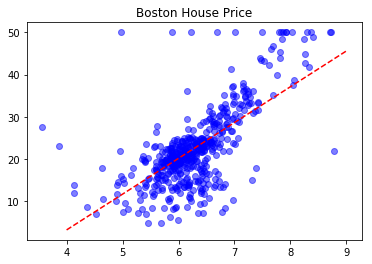

In [70]:
import matplotlib.pyplot as plt
x = range(4,10)
plt.title("Boston House Price")
plt.plot(X,y,'o',color = 'blue',alpha = 0.5)
plt.plot(x,reg.coef_*x+reg.intercept_,'--',color='red')
plt.show()